# Rain in Australia Prediction
---
This is project i am learning about classification models. The goal to predict whether it will rain tomorrow or not by training a binary classification model on target RainTomorrow. The dataset was drawn from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package  

About this dataset  
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.  
The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability. Read more about it [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316).

## Table of Contents <a name="BacktoTableofContents"></a>
1. [Import Libraries](#ImportLibraries)
2. [Data Exploration](#DataExploration)
3. [Data Cleaning](#DataCleaning)
    - [Deal with Date](#DealwithDate)
    - [Deal with Outlier](#DealwithOutlier)
    - [Deal with Missing Values](#DealwithMissingValues)
4. [Data Preparation](#DataPreparation)
5. [Modeling](#Modeling)
    - [Logistic Regression](#LogisticRegression)
    - [Decision Tree](#DecisionTree)
    - [Decision Tree with Parameters Tuning](#DecisionTreewithParametersTuning)
    - [Random Forest](#RandomForest)
    - [Random Forest with Parameter Tuning](#RandomForestwithParameterTuning)
    - [K Nearest Neighbors with Parameters Tuning](#KNearestNeighborswithParametersTuning)
    - [Support Vector Machine](#SupportVectorMachine)
    - [Naive Bayes](#NaiveBayes)
6. [Score Comparison](#ScoreComparison)

## 1. Import Libraries <a name="ImportLibraries"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [2]:
#Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

In [3]:
#Get data
df = pd.read_csv('weatherAUS.csv')

## 2. Data Exploration <a name="DataExploration"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [4]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [5]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[5 rows x 24 columns]

In [6]:
df.sample(5)

Date          Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
139459  2014-02-13         Katherine     23.9     34.9       6.0          5.6   
65702   2017-05-14  MelbourneAirport      3.9     13.5       0.0          1.4   
45270   2010-05-08          Canberra      0.7     19.0       0.0          1.4   
119546  2013-10-11             Perth     10.2     20.9       0.0          4.0   
25438   2014-05-28           Penrith     12.8     23.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
139459       NaN          NE           46.0        NNE  ...         NaN   
65702        2.6         SSE           19.0        WSW  ...        74.0   
45270        9.8           N           20.0        SSE  ...        49.0   
119546       6.5         SSW           41.0         NW  ...        90.0   
25438        NaN           W           48.0        NNW  ...        32.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
139459       1009.7       1005.7       2.0       4.0     27.1     33.5   
65702        1024.1       1021.9       2.0       7.0     10.2     13.2   
45270        1024.3       1020.8       1.0       1.0      7.5     18.4   
119546       1018.2       1016.2       5.0       7.0     18.4     15.5   
25438           NaN          NaN       NaN       NaN     17.5     22.4   

        RainToday  RISK_MM  RainTomorrow  
139459        Yes     12.4           Yes  
65702          No      0.2            No  
45270          No      0.0            No  
119546         No      2.2           Yes  
25438          No      0.0            No  

[5 rows x 24 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
#Looking unique values
print(df.nunique())

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64


In [9]:
#RISKMM is the amount of rainfall in millimeters for the next day. 
#It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow.
df.drop(['RISK_MM'], axis=1, inplace=True)

In [10]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

## 3. Data Cleaning <a name="DataCleaning"></a>
[Back to Table of Contents](#BacktoTableofContents)

### Deal with Date <a name="DealwithDate"></a>

In [11]:
#Convert to Date-time
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
#Exact Day, Month, Year, form Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#Drop the original Date feature
df.drop('Date', axis=1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

### Deal with Outlier  <a name="DealwithOutlier"></a>
[Back to Table of Contents](#BacktoTableofContents)

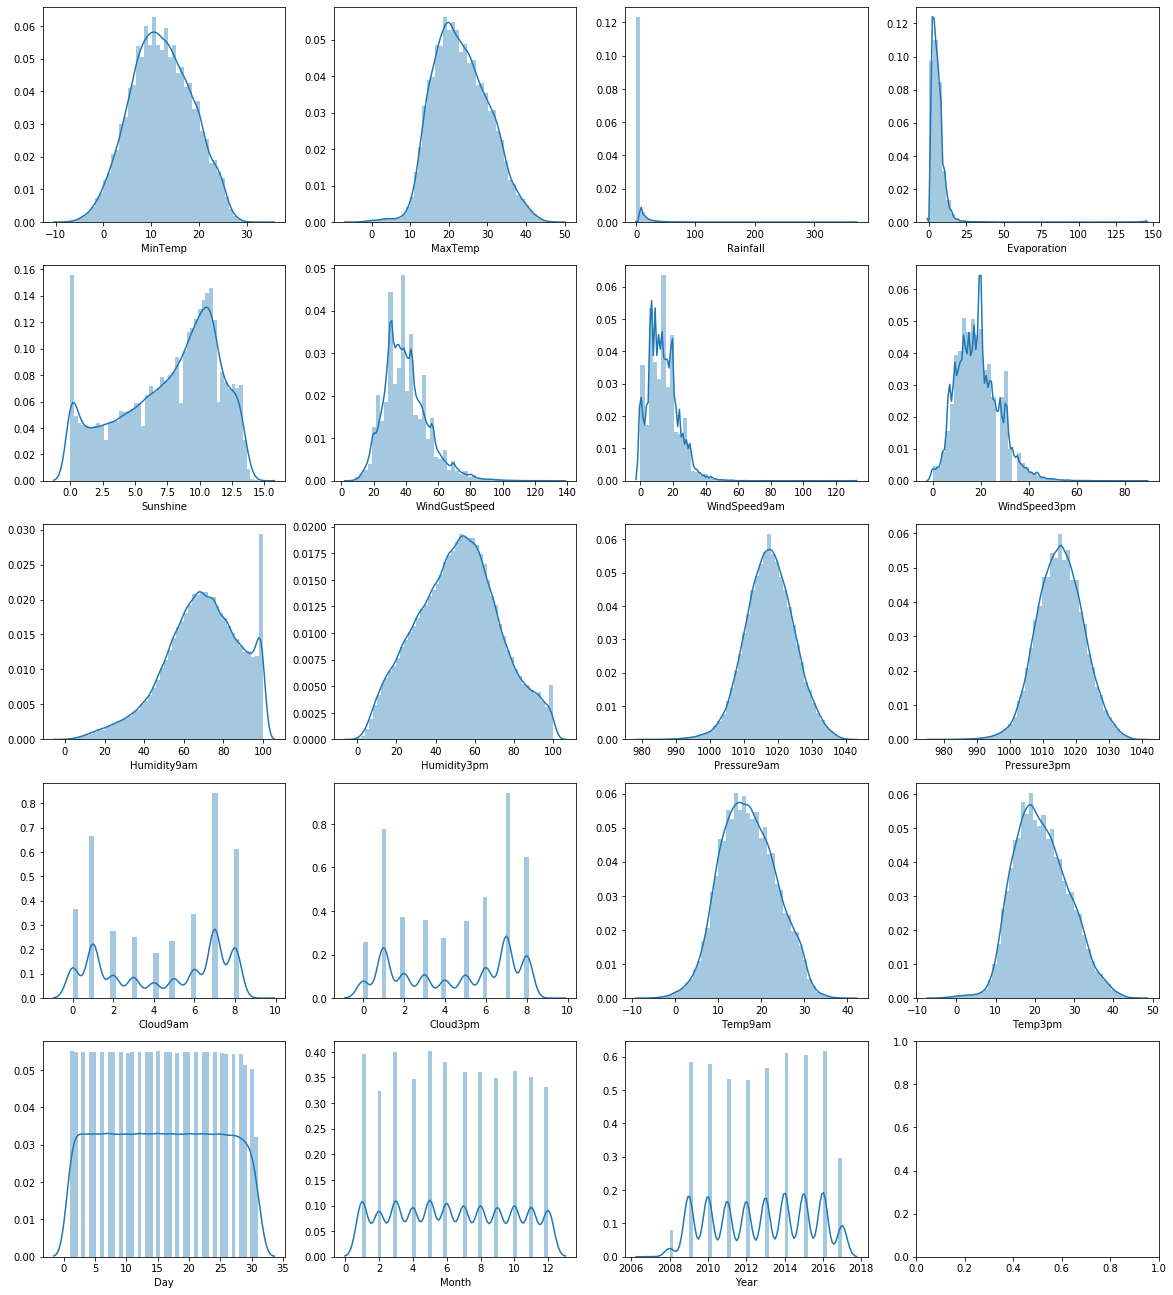

In [14]:
#Explore the distribution of each feature
cols1 = df.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)
f, axes = plt.subplots(5, 4, figsize=(20, 23))
axes=axes.ravel()
for i,col in enumerate(cols1):
    plot=sns.distplot(df[col], ax=axes[i])

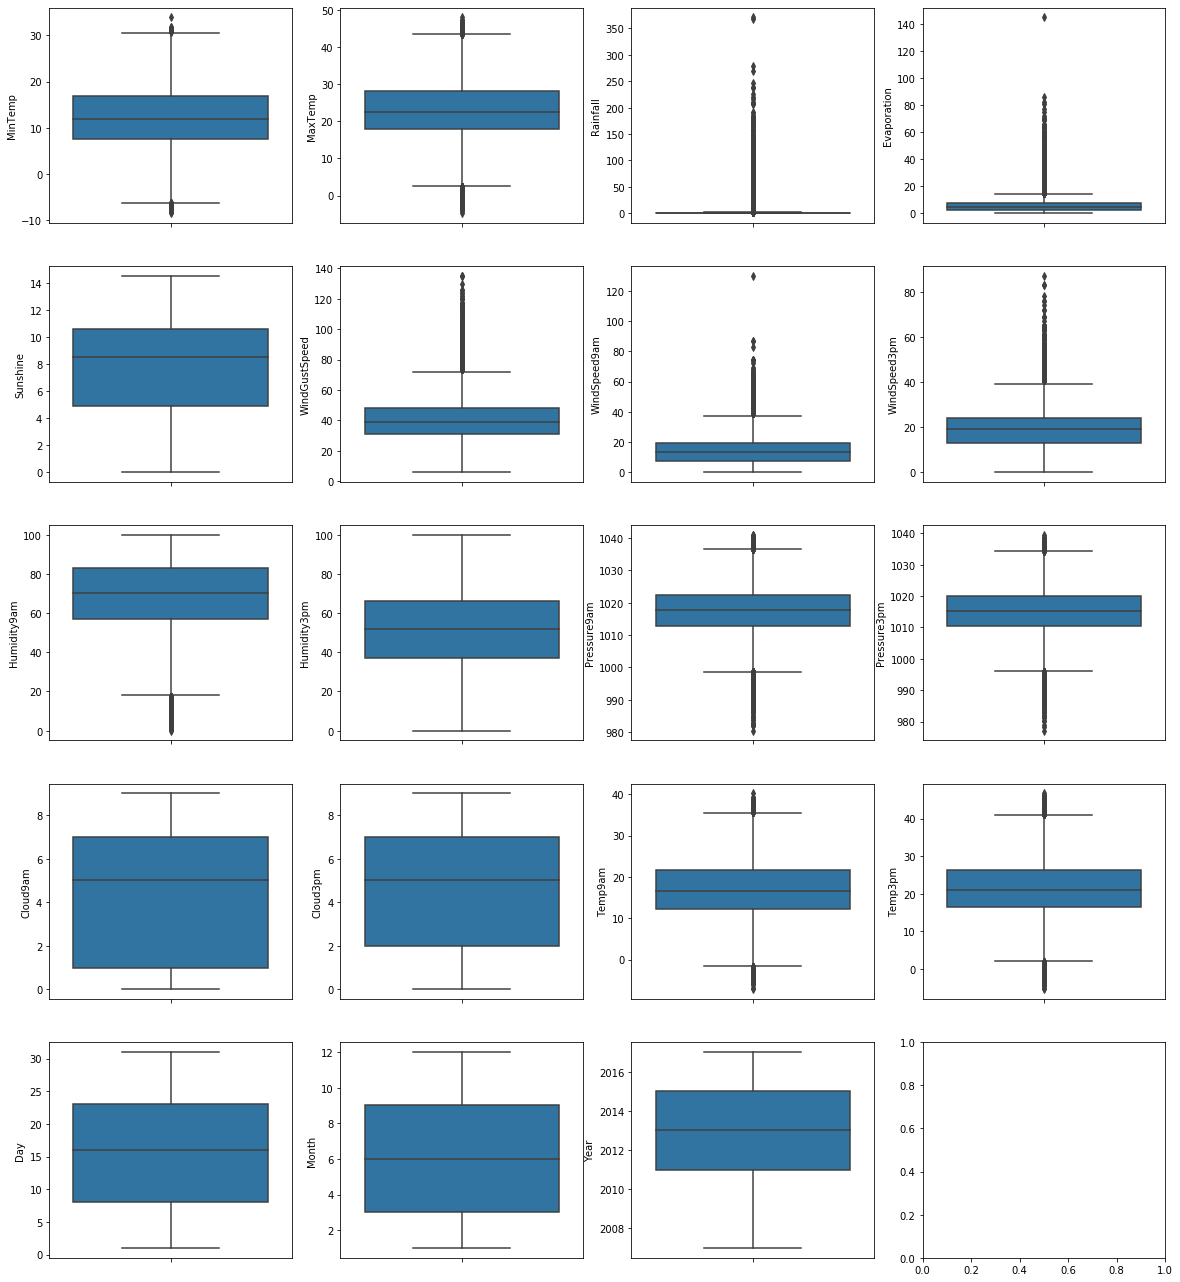

In [15]:
#Explore the distribution of each feature
cols2=df.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)
f, axes = plt.subplots(5, 4, figsize=(20, 23))
axes=axes.ravel()
for i,col in enumerate(cols2):
    plot=sns.boxplot(x=col, data=df, ax=axes[i], orient='v')

In [16]:
#Select 3 feature with too much outlier : 'Rainfall' , 'Evaporation', 'WindSpeed9am'
#Remove outliers : 3 * standard deviation and fill with 3*std
for i in ['Rainfall', 'Evaporation','WindSpeed9am'] :
    median = df[i].median()
    std = df[i].std()
    df[i] = [median+std*3 if abs(x - median) > std*3 else x for x in df[i]]

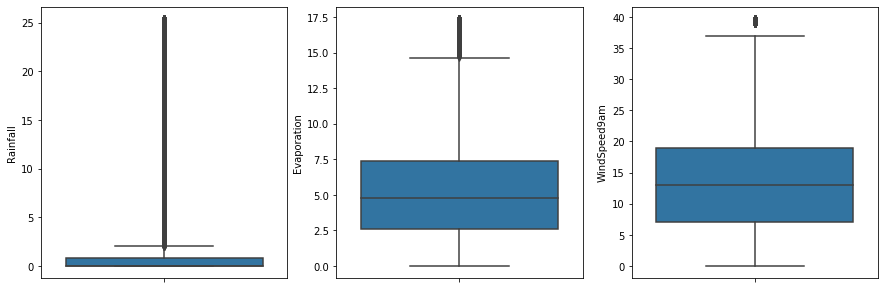

In [17]:
#Check 3 feature again
cols3 = df[['Rainfall', 'Evaporation','WindSpeed9am']]
f, axes = plt.subplots(1, 3, figsize=(15, 5))
axes=axes.ravel()
for i,col in enumerate(cols3):
    plot=sns.boxplot(x=col, data=df, ax=axes[i], orient='v')

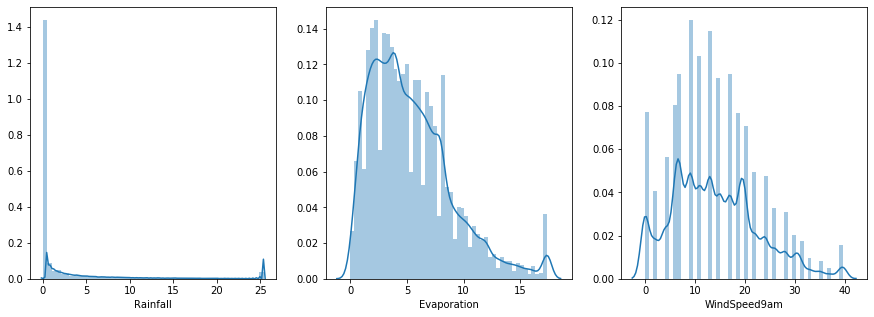

In [18]:
#Check 3 feature again
cols4 = df[['Rainfall', 'Evaporation','WindSpeed9am']]
f, axes = plt.subplots(1, 3, figsize=(15, 5))
axes=axes.ravel()
for i,col in enumerate(cols4):
    plot=sns.distplot(df[col], ax=axes[i])

### Deal with Missing Values <a name="DealwithMissingValues"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [19]:
#Total missing values each feature
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Day                  0
Month                0
Year                 0
dtype: int64

In [20]:
#Delete more than two columns of missing values
df_drop = df.dropna(thresh=22)

In [21]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94829 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       94829 non-null  object 
 1   MinTemp        94768 non-null  float64
 2   MaxTemp        94801 non-null  float64
 3   Rainfall       94710 non-null  float64
 4   Evaporation    78724 non-null  float64
 5   Sunshine       73259 non-null  float64
 6   WindGustDir    90897 non-null  object 
 7   WindGustSpeed  90908 non-null  float64
 8   WindDir9am     91847 non-null  object 
 9   WindDir3pm     94512 non-null  object 
 10  WindSpeed9am   94796 non-null  float64
 11  WindSpeed3pm   94815 non-null  float64
 12  Humidity9am    94592 non-null  float64
 13  Humidity3pm    94605 non-null  float64
 14  Pressure9am    94713 non-null  float64
 15  Pressure3pm    94761 non-null  float64
 16  Cloud9am       82672 non-null  float64
 17  Cloud3pm       81251 non-null  float64
 18  Temp9

In [22]:
#Fill numerical feature with median
numerical = df_drop.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)
for i in numerical:
    col_median=df_drop[i].median()
    df_drop[i].fillna(col_median, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
#Fill categorical feature with mode
categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in categorical:
    col_mode=df_drop[i].mode()[0]
    df_drop[i].fillna(col_mode, inplace=True)

## Data Preparation <a name="DataPreparation"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [24]:
#Converting categorical variables into dummy variables
#By using 1-hot encoding
df_dummies = pd.get_dummies(df_drop, drop_first=True)
print(df_dummies.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object', length=103)


In [25]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('RainTomorrow_Yes', axis=1), 
                                                    df_dummies['RainTomorrow_Yes'],
                                                    test_size=0.2, random_state=100)

In [26]:
#Scaling 
#Standardization
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()

X_std_train = sc_X_train.fit_transform(X_train)
X_std_test = sc_X_test.fit_transform(X_test)

In [27]:
#Scaling
#Normalization
min_max_scaler1 = MinMaxScaler()
min_max_scaler2 = MinMaxScaler()

arr_minmax1 = min_max_scaler1.fit_transform(X_train)
arr_minmax2 = min_max_scaler2.fit_transform(X_test)

X_n_train = pd.DataFrame(arr_minmax1, columns=df_dummies.columns[:-1])
X_n_test = pd.DataFrame(arr_minmax2, columns=df_dummies.columns[:-1])

## Modeling  <a name="Modeling"></a>
[Back to Table of Contents](#BacktoTableofContents)

### Logistic Regression <a name="LogisticRegression"></a>

In [28]:
lr = LogisticRegression()
lr.fit(X_n_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred_lr = lr.predict(X_n_test)
print(confusion_matrix(y_test,pred_lr))

[[13568  1103]
 [ 1663  2632]]


In [30]:
print('Accuracy = ', accuracy_score(y_test, pred_lr))
print('F1-Score = ', f1_score(y_test, pred_lr))
print('Precision = ', precision_score(y_test, pred_lr))
print('Recall = ', recall_score(y_test, pred_lr))

Accuracy =  0.85416007592534
F1-Score =  0.6555417185554171
Precision =  0.7046854082998661
Recall =  0.6128055878928987


### Decision Tree <a name="DecisionTree"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [61]:
dt= DecisionTreeClassifier()
dt.fit(X_n_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
pred_dt = dt.predict(X_n_test)
print(confusion_matrix(y_test,pred_dt))

[[12236  2435]
 [ 1847  2448]]


In [63]:
print('Accuracy = ', accuracy_score(y_test, pred_dt))
print('F1-Score = ', f1_score(y_test, pred_dt))
print('Precision = ', precision_score(y_test, pred_dt))
print('Recall = ', recall_score(y_test, pred_dt))

Accuracy =  0.7742275651165244
F1-Score =  0.5334495532795815
Precision =  0.5013311488838829
Recall =  0.569965075669383


### Decision Tree with Parameters Tuning <a name="DecisionTreewithParametersTuning"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [ ]:
param_dt = {'max_depth' : np.arange(1, 17), 'min_samples_leaf' : np.arange(1, 27)}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dt, verbose=3)
dt_grid.fit(X_n_train, y_train)

In [65]:
print(dt_grid.best_params_)

{'max_depth': 7, 'min_samples_leaf': 12}


In [66]:
pred_dt_grid = dt_grid.predict(X_n_test)
print(confusion_matrix(y_test, pred_dt_grid))

[[13732   939]
 [ 2011  2284]]


In [67]:
print('Accuracy = ', accuracy_score(y_test, pred_dt_grid))
print('F1-Score = ', f1_score(y_test, pred_dt_grid))
print('Precision = ', precision_score(y_test, pred_dt_grid))
print('Recall = ', recall_score(y_test, pred_dt_grid))

Accuracy =  0.8444585046926079
F1-Score =  0.607608406491088
Precision =  0.7086565311821285
Recall =  0.5317811408614668


### Random Forest <a name="RandomForest"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [68]:
rf = RandomForestClassifier()
rf.fit(X_n_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pred_rf = rf.predict(X_n_test)
print(confusion_matrix(y_test, pred_rf))

[[13805   866]
 [ 1820  2475]]


In [70]:
print('Accuracy = ', accuracy_score(y_test, pred_rf))
print('F1-Score = ', f1_score(y_test, pred_rf))
print('Precision = ', precision_score(y_test, pred_rf))
print('Recall = ', recall_score(y_test, pred_rf))

Accuracy =  0.858378150374354
F1-Score =  0.6482451545311683
Precision =  0.740796168811733
Recall =  0.5762514551804424


### Random Forest with Parameter Tuning <a name="RandomForestwithParameterTuning"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [ ]:
param_rf = {'max_depth' : np.arange(1, 17), 
            'min_samples_leaf' : np.arange(1, 27),
            'n_estimators' : [10, 20, 50, 100, 300, 500]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, verbose=3)
rf_grid.fit(X_n_train, y_train)

In [72]:
print(rf_grid.best_params_)

{'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 500}


In [73]:
pred_rf_grid = rf_grid.predict(X_n_test)
print(confusion_matrix(y_test, pred_rf_grid))

[[13900   771]
 [ 1899  2396]]


In [75]:
print('Accuracy = ', accuracy_score(y_test, pred_rf_grid))
print('F1-Score = ', f1_score(y_test, pred_rf_grid))
print('Precision = ', precision_score(y_test, pred_rf_grid))
print('Recall = ', recall_score(y_test, pred_rf_grid))

Accuracy =  0.859221765264157
F1-Score =  0.6421870812114715
Precision =  0.7565519419008525
Recall =  0.5578579743888242


### K Nearest Neighbors with Parameters Tuning <a name="KNearestNeighborswithParametersTuning"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [ ]:
param_knn = {'n_neighbors' : np.arange(1, 31)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_knn, verbose=3)
knn_grid.fit(X_n_train, y_train)

In [28]:
print(knn_grid.best_params_)

{'n_neighbors': 17}


In [29]:
pred_knn_grid = knn_grid.predict(X_n_test)
print(confusion_matrix(y_test, pred_knn_grid))

[[14063   608]
 [ 2899  1396]]


In [30]:
print('Accuracy = ', accuracy_score(y_test, pred_knn_grid))
print('F1-Score = ', f1_score(y_test, pred_knn_grid))
print('Precision = ', precision_score(y_test, pred_knn_grid))
print('Recall = ', recall_score(y_test, pred_knn_grid))

Accuracy =  0.8150901613413477
F1-Score =  0.44324495951738374
Precision =  0.6966067864271457
Recall =  0.3250291036088475


### Support Vector Machine  <a name="SupportVectorMachine"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [76]:
svc = SVC()
svc.fit(X_n_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
pred_svc = svc.predict(X_n_test)
print(confusion_matrix(y_test, pred_svc))

[[13871   800]
 [ 1729  2566]]


In [78]:
print('Accuracy = ', accuracy_score(y_test, pred_svc))
print('F1-Score = ', f1_score(y_test, pred_svc))
print('Precision = ', precision_score(y_test, pred_svc))
print('Recall = ', recall_score(y_test, pred_svc))

Accuracy =  0.8666561214805442
F1-Score =  0.6698864378018535
Precision =  0.76232917409388
Recall =  0.5974388824214203


### Naive Bayes <a name="NaiveBayes"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [32]:
nb = GaussianNB()
nb.fit(X_n_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
pred_nb = nb.predict(X_n_test)
print(confusion_matrix(y_test, pred_nb))

[[9651 5020]
 [1018 3277]]


In [34]:
print('Accuracy = ', accuracy_score(y_test, pred_nb))
print('F1-Score = ', f1_score(y_test, pred_nb))
print('Precision = ', precision_score(y_test, pred_nb))
print('Recall = ', recall_score(y_test, pred_nb))

Accuracy =  0.6816408309606664
F1-Score =  0.5204891994917408
Precision =  0.3949620344702905
Recall =  0.7629802095459837


## 6. Score Comparison <a name="ScoreComparison"></a>
[Back to Table of Contents](#BacktoTableofContents)

In [70]:
value = {
         'Accuracy' : [0.8542, 0.7742, 0.8445, 0.8584, 0.8592, 0.8151, 0.8667, 0.6816 ],
         'F1 Score' : [0.6555, 0.5334, 0.6076, 0.6482, 0.6422, 0.4432, 0.67, 0.5205],
         'Precision' : [0.7047, 0.5013, 0.7087, 0.7408, 0.7566, 0.6966, 0.7623, 0.395],
         'Recall' : [0.6128, 0.57, 0.5318, 0.5763, 0.5579, 0.3250, 0.5974, 0.763]
         }
Models = ['LR', 'DT', 'DT(Tuning)','RF', 'RF(Tuning)','KNN(Tuning)', 'SVM', 'NB']
df_m = pd.DataFrame(value, index=Models)
df_m

Accuracy  F1 Score  Precision  Recall
LR             0.8542    0.6555     0.7047  0.6128
DT             0.7742    0.5334     0.5013  0.5700
DT(Tuning)     0.8445    0.6076     0.7087  0.5318
RF             0.8584    0.6482     0.7408  0.5763
RF(Tuning)     0.8592    0.6422     0.7566  0.5579
KNN(Tuning)    0.8151    0.4432     0.6966  0.3250
SVM            0.8667    0.6700     0.7623  0.5974
NB             0.6816    0.5205     0.3950  0.7630

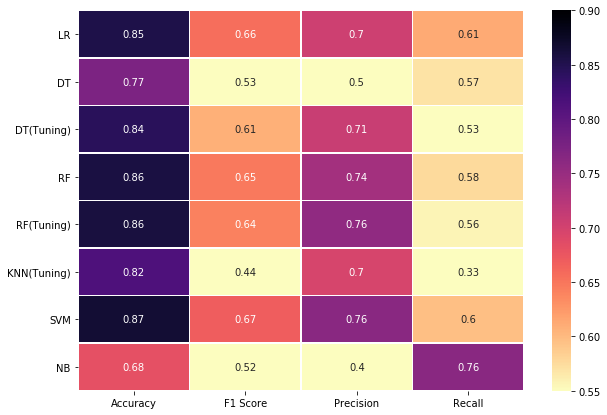

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(df_m, annot=True, linewidth=0.5, linecolor='white', cmap='magma_r', vmin=0.55, vmax=0.9)